In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [26]:
Pkg.add(["Plots","FFTW","LinearAlgebra","DSP","CompressedSensing"])

   Resolving package versions...
   Installed OpenBLAS32_jll ──────────── v0.3.24+0
   Installed FFMPEG ──────────────────── v0.4.2
   Installed ECOS ────────────────────── v1.1.2
   Installed MUMPS_seq_jll ───────────── v500.700.300+0
   Installed CoinUtils_jll ───────────── v200.1100.1100+0
   Installed METIS_jll ───────────────── v5.1.2+0
   Installed ECOS_jll ────────────────── v200.0.800+0
   Installed LazyInverses ────────────── v1.1.4
   Installed MathOptInterface ────────── v1.31.2
   Installed Osi_jll ─────────────────── v0.10800.1000+0
   Installed WoodburyFactorizations ──── v1.1.0
   Installed OpenSSL_jll ─────────────── v3.0.15+1
   Installed CompressedSensing ───────── v1.0.1
   Installed Clp_jll ─────────────────── v100.1700.901+0
   Installed Clp ─────────────────────── v1.1.0
   Installed JuMP ────────────────────── v0.23.2
   Installed UpdatableQRFactorizations ─ v1.0.0
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
  [adc28fdd] + CompressedSensing v

In [42]:
using Plots, FFTW, DSP, LinearAlgebra, Random, Distributions, CompressedSensing

[ Info: Precompiling CompressedSensing [adc28fdd-7b77-41a2-89a7-a1a193b336a0]
[ Info: Precompiling DistributionsTestExt [ffbe0ea5-a612-5ff7-aaf5-cac02eef3019]
[ Info: Precompiling PolynomialsMutableArithmeticsExt [2016f45f-0850-5d4f-b1e3-7a95b670587c]


In [6]:
n = 4096
t = LinRange(0,1,n)

4096-element LinRange{Float64, Int64}:
 0.0, 0.0002442, 0.0004884, 0.000732601, …, 0.999267, 0.999512, 0.999756, 1.0

In [16]:
x = cos.(2 * 97 * π .* t) + cos.(2 * 777 * π .* t)
fx = fft(x)
psd = abs.(fx) .^ 2 ./n
f = fftfreq(n, 1/t[2])

4096-element Vector{Float64}:
 1.3127168473228159e-27
 3.116361640880604e-11
 1.246550327658898e-10
 2.804759503968004e-10
 4.986292003096167e-10
 7.791187541036543e-10
 1.1219497106201305e-9
 1.5271283037704643e-9
 1.9946619051299335e-9
 2.5245590359814065e-9
 3.116829293022803e-9
 3.7714834875447715e-9
 4.488533518915176e-9
 ⋮
 4.488533518916113e-9
 3.771483487551582e-9
 3.1168292929729572e-9
 2.5245590358204864e-9
 1.9946619051058716e-9
 1.5271283037680672e-9
 1.1219497106187605e-9
 7.791187541025943e-10
 4.986292003098511e-10
 2.8047595039700854e-10
 1.2465503276613118e-10
 3.116361640857584e-11

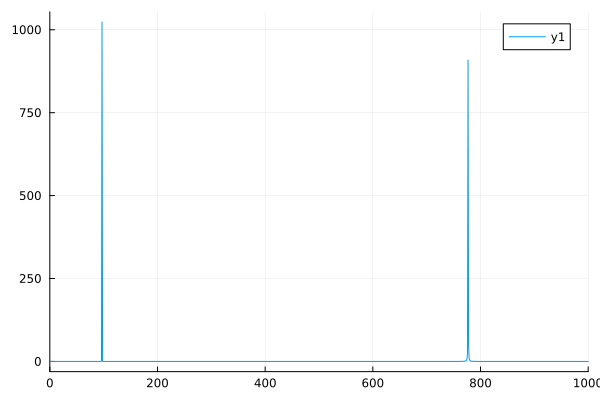

In [22]:
plot(fs, psds, xlimit = (0,1000))

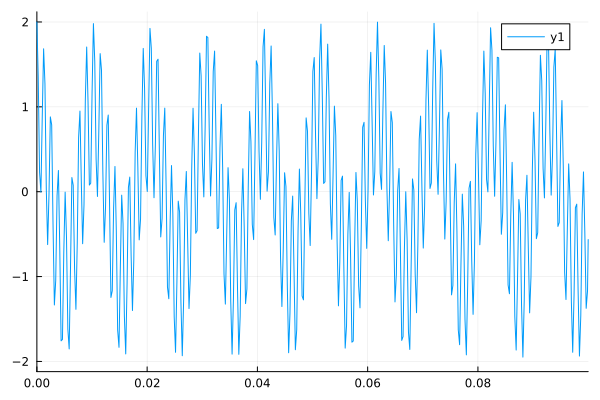

In [25]:
plot(t,x, xlimit=(0,0.1))

In [113]:
p = 128
perm = rand(1:n, p)
y = x[perm]
Psi = dct(LinearAlgebra.I(n))
Theta = Psi[perm,:]

128×4096 Matrix{Float64}:
 0.0   1.84171e-18   0.0          -1.47729e-18  …   0.0          -1.89907e-18
 0.0   0.0          -2.67006e-18   0.0              1.60111e-19   0.0
 0.0  -7.56292e-19   0.0          -3.39858e-18      0.0          -1.16028e-18
 0.0   5.47868e-18   0.0          -5.85402e-18      0.0           6.11933e-20
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   0.0          -2.73916e-18   0.0          …  -3.75706e-18   0.0
 0.0   0.0           0.0           0.0              0.0           0.0
 0.0   4.5425e-18    0.0          -4.79371e-18      0.0           4.44932e-18
 0.0   0.0          -6.2131e-18    0.0             -6.67739e-19   0.0
 0.0   4.28567e-18   0.0          -2.48887e-19      0.0          -6.80465e-18
 0.0  -2.33573e-18   0.0           3.46142e-18  …   0.0           5.14593e-18
 0.0   4.2892e-20    0.0           2.20105e-18      0.0           3.71885e-19
 0.0   1.25246e-18   0.0           4.35794e-18      0.0          -2.59879e-19


In [91]:
maximum(Theta)

1.0000000000000004

In [121]:
s = CompressedSensing.gomp(Theta,y,1,1e-10,10)

4096-element SparseArrays.SparseVector{Float64, Int64} with 10 stored entries:
  [146 ]  =  -1.9137
  [1145]  =  1.72838
  [1163]  =  -1.98155
  [1355]  =  1.75097
  [1440]  =  1.82383
  [1495]  =  -1.75604
  [2283]  =  1.941
  [2573]  =  1.88
  [2662]  =  1.81603
  [3698]  =  -1.89194

In [122]:
xrecon = idct(s)

4096-element Vector{Float64}:
  0.05316875818120585
 -0.13904404293660488
 -0.08816112270987099
  0.06627425967630142
 -0.15972092763071644
 -0.0027724648907583235
  0.05481532805746931
 -0.014814400206911452
 -0.12538713340920682
 -0.004306249683694871
 -0.02939464434319649
 -0.01147688161217577
  0.09912856844723833
  ⋮
 -0.028982820650938455
  0.02067812272995824
 -0.011593807616818856
  0.042103697505565627
  0.08643259305650992
  0.08256857471874351
 -0.11367621960319324
  0.054206186404959424
  0.07930614835347516
  0.09534301962591006
 -0.005868217593868949
  0.03974747309343807

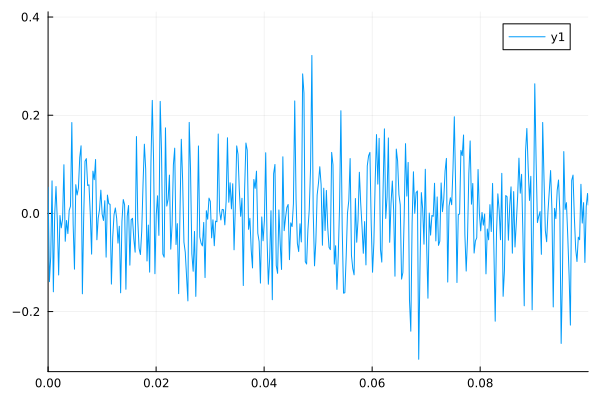

In [123]:
plot(t,xrecon,xlimit=(0,0.1))